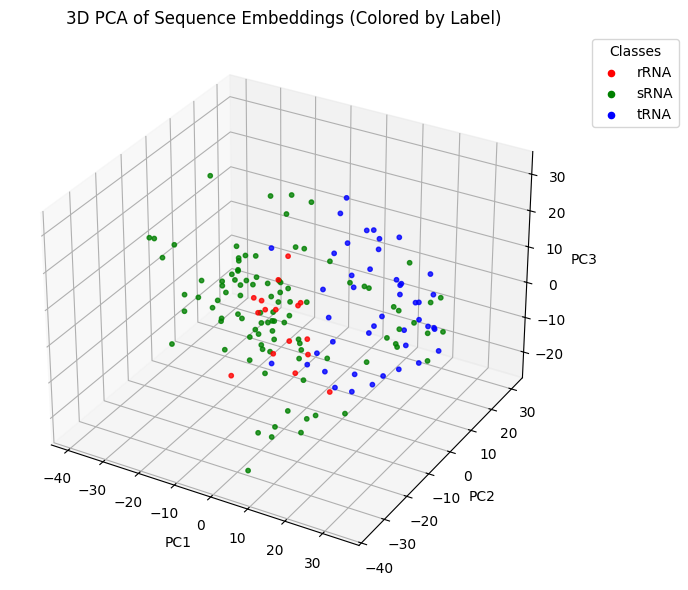

In [22]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Load features and labels
features = np.load("features-250.npy")
labels = np.load("labels-250.npy")

# Extract last layer embedding
features = features[:, -1, :]

# Convert labels to numeric if they are strings
le = LabelEncoder()
label_ids = le.fit_transform(labels)
class_names = le.classes_

# Run PCA projection
pca = PCA(n_components=3)
X_pca = pca.fit_transform(features)

# Set colors for the scattered points with label_ids
fixed_colors = ['red', 'green', 'blue']
colors = [fixed_colors[i % 3] for i in label_ids]

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, s=10, alpha=0.8)

# Custom legend
for i, name in enumerate(class_names[:3]):
    ax.scatter([], [], [], color=fixed_colors[i], label=name)

ax.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title("3D PCA of Sequence Embeddings (Colored by Label)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()



c:\Users\92083\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(161, 2)


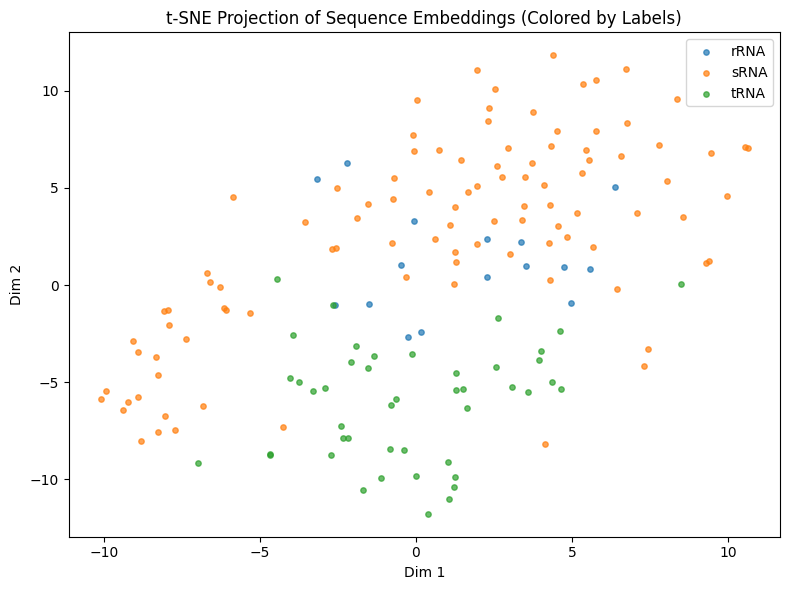

In [23]:
from sklearn.manifold import TSNE

# Run t-SNE projection, this should preserve the locality between data points
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(features) # Project the data matrix to (n, 2)
print(X_tsne.shape)

# Plot
plt.figure(figsize=(8, 6))
for i, cls in enumerate(class_names):
    idx = label_ids == i
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=cls, s=15, alpha=0.7)

plt.title("t-SNE Projection of Sequence Embeddings (Colored by Labels)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(features)

v_score = v_measure_score(label_ids, cluster_labels)
print(f"V-measure score: {v_score:.3f}")

V-measure score: 0.383


c:\Users\92083\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


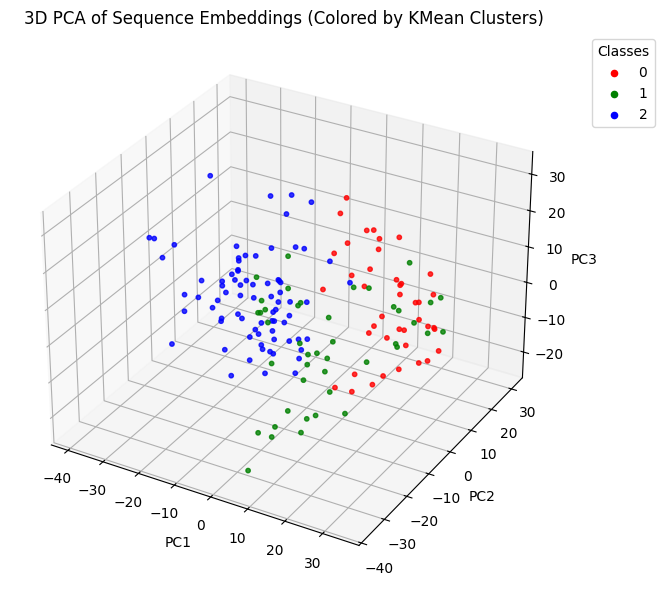

In [25]:
# Set color to KMeans cluster labels
colors = [fixed_colors[i] for i in cluster_labels]

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, s=10, alpha=0.8)

# Custom legend
for i, name in enumerate(range(3)):
    ax.scatter([], [], [], color=fixed_colors[i], label=name)

ax.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title("3D PCA of Sequence Embeddings (Colored by KMean Clusters)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()

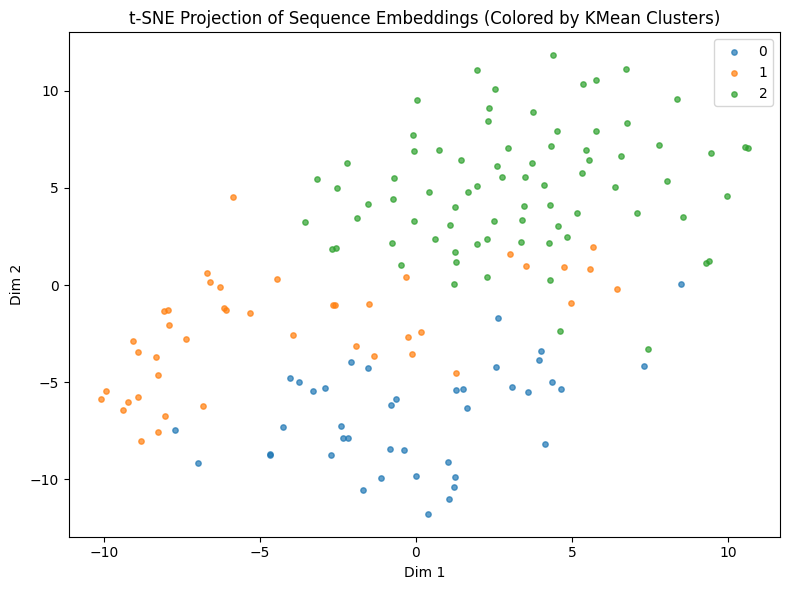

In [26]:
# Plot
plt.figure(figsize=(8, 6))
for i, cls in enumerate(class_names):
    idx = cluster_labels == i # Color with KMeans cluster labels
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=i, s=15, alpha=0.7)

plt.title("t-SNE Projection of Sequence Embeddings (Colored by KMean Clusters)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)

spectral_labels = sc.fit_predict(features)

v_score = v_measure_score(label_ids, spectral_labels)
print(f"V-measure score: {v_score:.3f}")


V-measure score: 0.448


c:\Users\92083\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


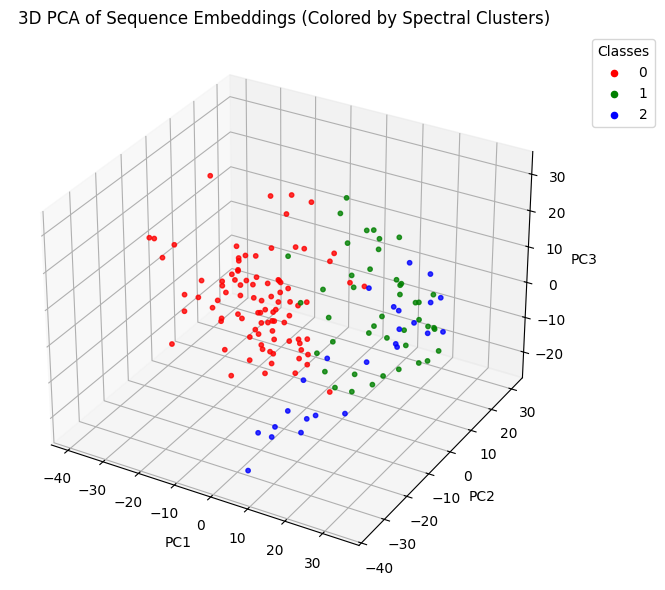

In [ ]:
# Color with spectral labels
colors = [fixed_colors[i] for i in spectral_labels]

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, s=10, alpha=0.8)

# Custom legend
for i, name in enumerate(range(3)):
    ax.scatter([], [], [], color=fixed_colors[i], label="cluster " + name)

ax.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title("3D PCA of Sequence Embeddings (Colored by Spectral Clusters)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()

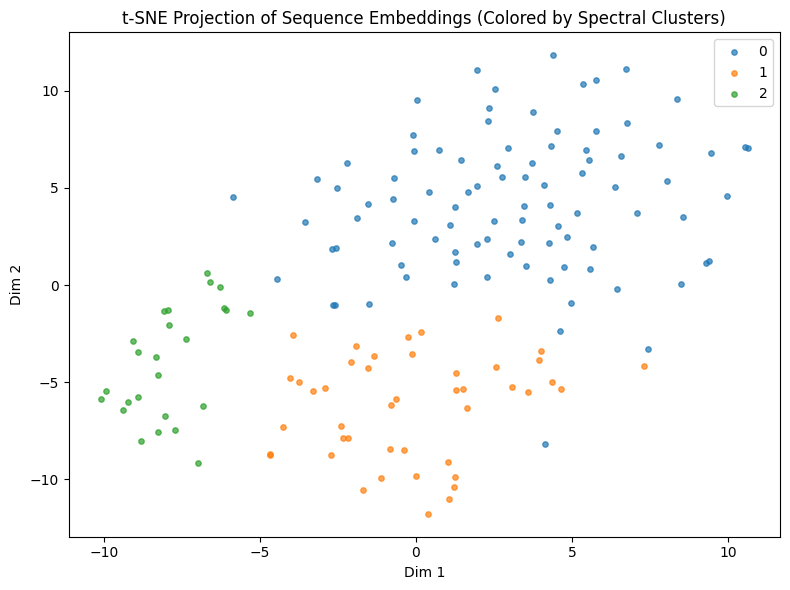

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
for i, cls in enumerate(class_names):
    idx = spectral_labels == i # color with spectral labels
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label="cluster" + i, s=15, alpha=0.7)

plt.title("t-SNE Projection of Sequence Embeddings (Colored by Spectral Clusters)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split
# print(label_ids)
X_train, X_test, y_train, y_test = train_test_split(
    features, label_ids,
    test_size=0.3,
    random_state=42,
    stratify=label_ids  # ← guarantees class presence in both sets
)
print(y_test)
# Train multinomial logistic regression (softmax)
clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(clf.predict(X_test))
print(clf.predict(X_train))

print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[1 2 2 2 1 1 2 1 1 1 1 2 1 1 2 1 2 1 1 0 1 1 1 1 2 2 2 1 1 0 1 1 1 2 1 1 1
 0 1 1 1 2 1 1 2 0 1 2 0]
[1 2 2 2 1 1 2 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 0 1 1 1 0 1 2 1 1 1
 1 1 1 1 2 1 1 2 1 1 2 0]
[1 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 1 2 0 1 1 2 0 1 1 1 1 2 1 2 1 1 1 1 2 2 2
 1 1 1 1 1 1 0 1 1 1 0 0 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 1 1 1 1
 2 1 1 2 1 2 1 1 2 0 2 1 1 0 1 2 1 0 2 2 2 1 2 1 2 1 2 2 0 1 1 1 1 1 1 2 1
 1]
Accuracy: 0.878

Classification Report:
              precision    recall  f1-score   support

        rRNA       0.33      0.20      0.25         5
        sRNA       0.88      0.93      0.90        30
        tRNA       1.00      1.00      1.00        14

    accuracy                           0.88        49
   macro avg       0.74      0.71      0.72        49
weighted avg       0.86      0.88      0.86        49

Confusion Matrix:
[[ 1  4  0]
 [ 2 28  0]
 [ 0  0 14]]


c:\Users\92083\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
